In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC

from data_prep import y_train, y_test, tf_idf_data_train, tf_idf_data_test
from visualizations import confusion_matrix_heat_map

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
# parameters = {'C': [0.1, 1, 10],
#               'kernel': ['rbf', 'linear', 'poly', 'sigmoid', 'precomputed']}

parameters = {'C': [1],
              'kernel': ['linear']}

In [3]:
SVM = SVC(gamma='auto', random_state=0)
svm_classifier = GridSearchCV(SVM, parameters, cv=3, n_jobs= -1)
svm_classifier.fit(tf_idf_data_train, y_train)
print(svm_classifier.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


In [4]:
svm_train_preds = svm_classifier.predict(tf_idf_data_train)
svm_test_preds = svm_classifier.predict(tf_idf_data_test)

svm_train_score = accuracy_score(y_train, svm_train_preds)
svm_test_score = accuracy_score(y_test, svm_test_preds)

svm_cv_score = cross_val_score(svm_classifier, tf_idf_data_train, y_train, cv=3, scoring="accuracy")

In [7]:
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(svm_train_score, svm_test_score))
print("CV Scores:", svm_cv_score)

Training Accuracy: 0.8993 		 Testing Accuracy: 0.6405
CV Scores: [0.69817802 0.70698925 0.78748507]


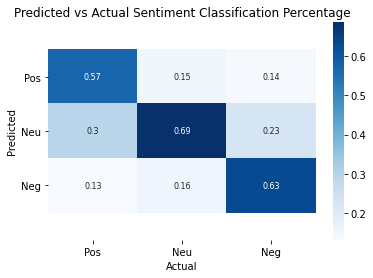

In [8]:
confusion_matrix_heat_map(svm_classifier, tf_idf_data_test, y_test)